In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
## MlP Hosuing Regression problem 
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
# using Sequential API to build, train, evluate and use regression to make predictions
# ouput layer is a single neuron with no activation function

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# loss function is MSE 
# using optimizer as Stochastic Gradient Decsent 
model.compile(loss='mean_squared_error', optimizer ='sgd')

history = model.fit(X_train, y_train,
                    epochs = 20,
                    validation_data = (X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3593 - val_loss: 0.3853
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3682 - val_loss: 0.3647
Epoch 3/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3554 - val_loss: 0.3662
Epoch 4/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3555 - val_loss: 0.3710
Epoch 5/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3624 - val_loss: 0.3650
Epoch 6/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3524 - val_loss: 0.3616
Epoch 7/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3549 - val_loss: 0.3608
Epoch 8/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3503 - val_loss: 0.3630
Epoch 9/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3562 - val_l

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [15]:
history.history

{'loss': [0.35931673800503766,
  0.3682303072921579,
  0.3553605007160131,
  0.3554711030691888,
  0.36236910681648565,
  0.35244544199270794,
  0.35492681076462984,
  0.3503164974576332,
  0.3561720894776368,
  0.35316138206937003,
  0.37163116697809184,
  0.3567048991322004,
  0.3455604277531922,
  0.3472503146151856,
  0.3475423958951497,
  0.34303110575850515,
  0.34385176029932285,
  0.3414187027913142,
  0.3428660692221948,
  0.339717073655149],
 'val_loss': [0.3852684591937743,
  0.36473210171365616,
  0.36622393043466317,
  0.37103659559897983,
  0.36495632348288554,
  0.3616022600992089,
  0.36083518550839533,
  0.3629588866264629,
  0.3698937514955683,
  0.3593859544712136,
  0.35877446576144345,
  0.36543246464519846,
  0.35290261924420835,
  0.35283857633285126,
  0.3543718752934951,
  0.35816873262710963,
  0.35155828005275674,
  0.3552224186809796,
  0.35203445770943814,
  0.35051070684302377]}

In [16]:
history.params

{'batch_size': 32,
 'epochs': 20,
 'steps': None,
 'samples': 11610,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

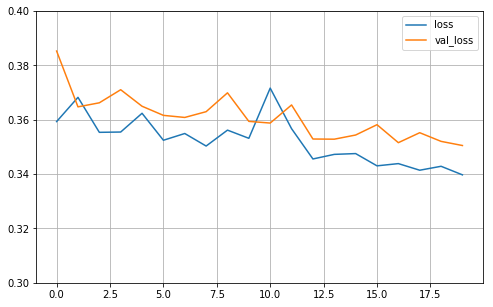

In [18]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0.3,0.4)
plt.show()

In [19]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 16us/sample - loss: 0.3425


In [22]:
X_new = X_test[:3]
print(X_new)
y_pred = model.predict(X_new)
y_pred

[[ 2.03778642 -1.63269974  1.47872814  0.39604585 -1.27569436  0.09284319
  -0.75601483  0.97855224]
 [-0.71282585  0.66567457 -0.61430238 -0.12811502 -0.52677804  0.21264989
  -0.72792523  0.75377113]
 [-0.36069382  0.50716599 -0.05103212 -0.31469231 -0.52496248  0.00688381
  -1.37398615  1.24329442]]


array([[3.5571933],
       [1.2696053],
       [1.5360727]], dtype=float32)